In [1]:
%pip install seaborn
%pip install folium

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [3]:
df = pd.read_csv(r"https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv")
df

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
524,9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
525,10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California
526,11/30/2023,2023,Nov,0,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia


In [4]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [5]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

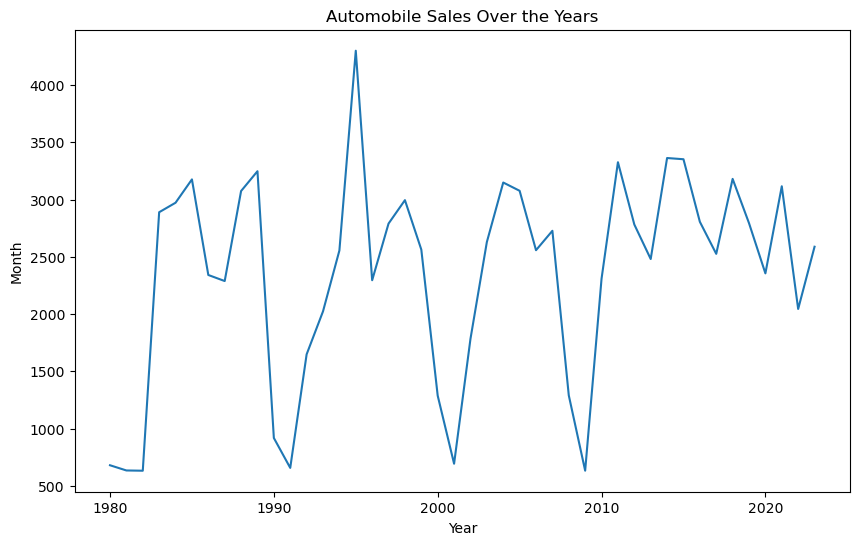

In [20]:
# Create data for plotting
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()

# Create figure
plt.figure(figsize=(10, 6))
df_line.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Month')
plt.title('Automobile Sales Over the Years')
plt.show()   

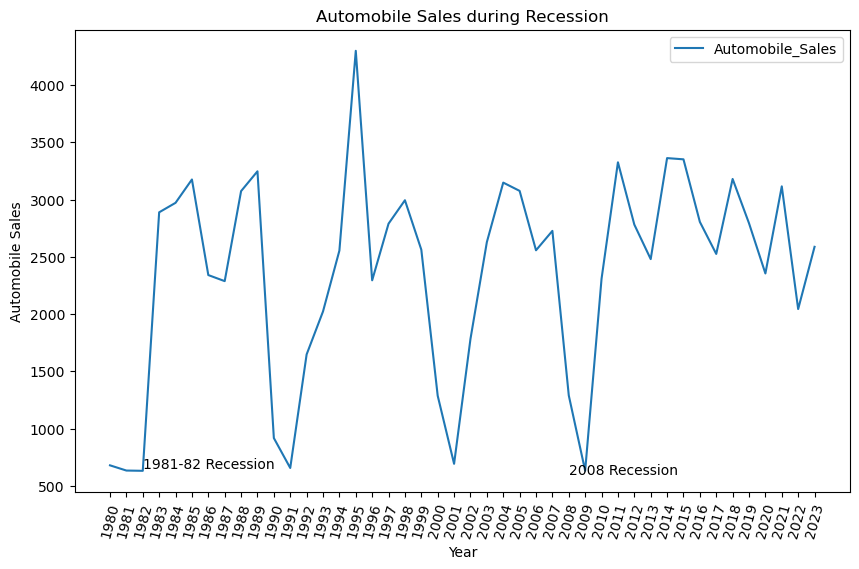

In [22]:
plt.figure(figsize=(10, 6))

# افترض أن df_line تم تعريفه بشكل صحيح لتمثيل البيانات المطلوبة
df_line.plot(kind='line')

# تعيين العلامات على المحور السيني
plt.xticks(list(range(1980, 2024)), rotation=75)

# تعيين التسميات والعنوان
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Automobile Sales during Recession')

# إضافة التعليقات التوضيحية
plt.text(1982, 650, '1981-82 Recession')
plt.text(2008, 600, '2008 Recession')

plt.legend()
plt.show()

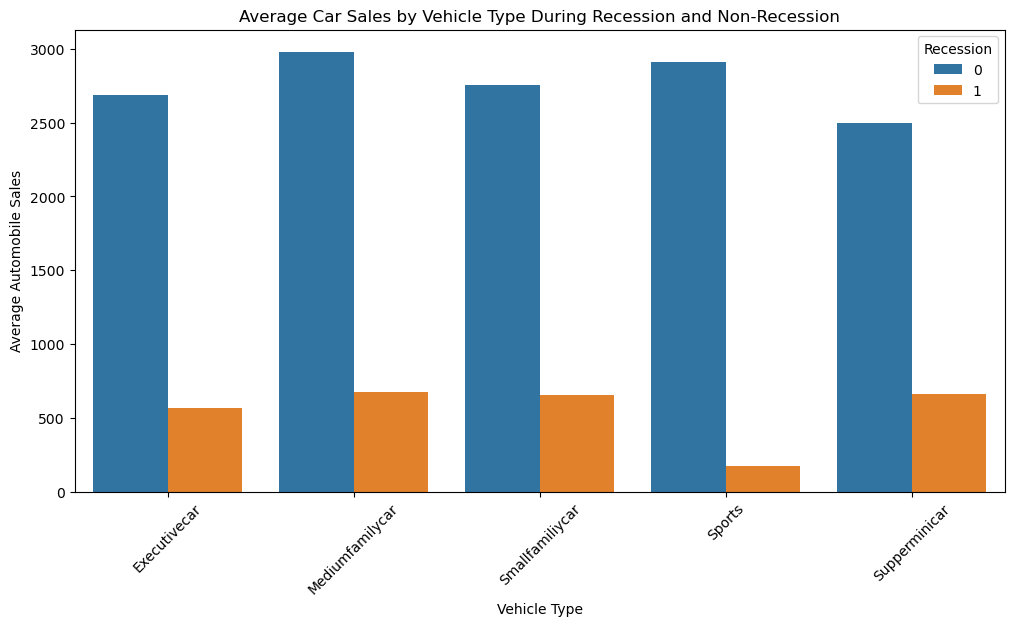

In [24]:
# Assume df is the DataFrame containing the required data
# Group the data to calculate the average sales for each vehicle type during recession and non-recession periods
new_df = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Create the bar chart using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Vehicle_Type', y='Automobile_Sales', hue='Recession', data=new_df)
plt.xlabel('Vehicle Type')
plt.ylabel('Average Automobile Sales')
plt.title('Average Car Sales by Vehicle Type During Recession and Non-Recession')
plt.xticks(rotation=45)
plt.show()

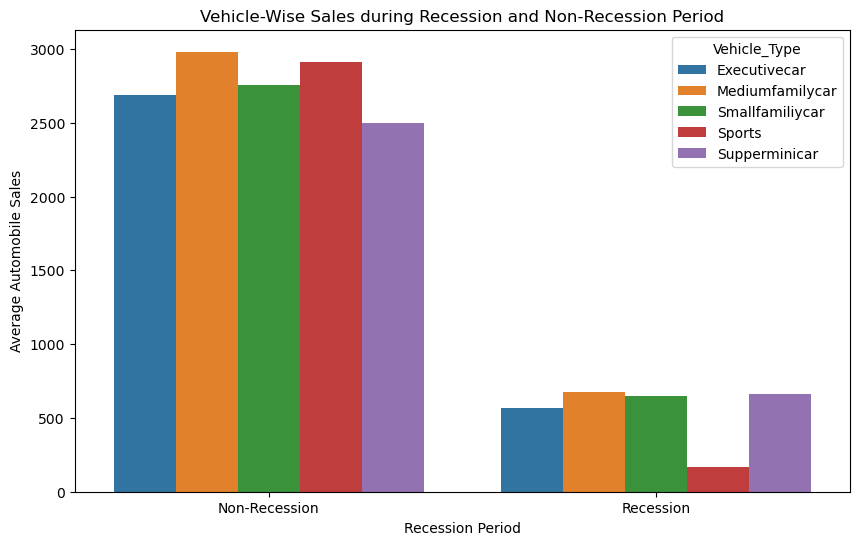

In [26]:
# افترض أن df هو إطار البيانات الذي يحتوي على البيانات المطلوبة
# تجميع البيانات لحساب متوسط المبيعات لكل نوع مركبة خلال فترات الركود وغير الركود
dd = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# إنشاء الرسم البياني الشريطي باستخدام seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Recession Period')
plt.ylabel('Average Automobile Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.show()

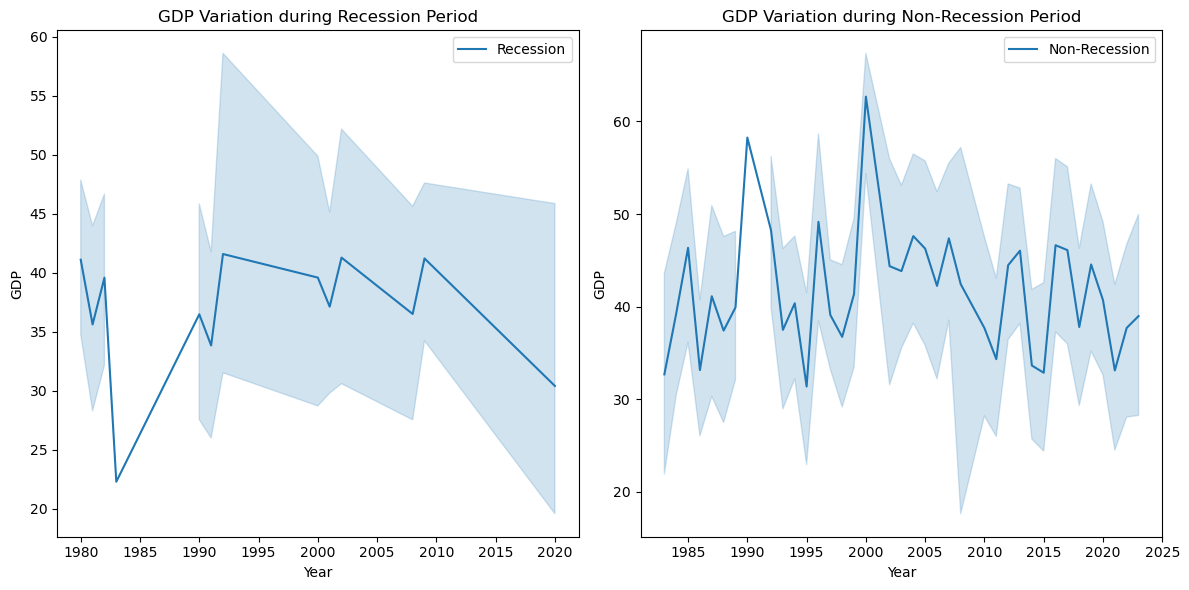

In [28]:
# افترض أن df هو إطار البيانات الذي يحتوي على البيانات المطلوبة
# إنشاء إطارات بيانات لفترات الركود وفترات غير الركود
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# إنشاء الشكل والمحاور
fig = plt.figure(figsize=(12, 6))

# إنشاء محاور للتقطيع الفرعي
ax0 = fig.add_subplot(1, 2, 1)  # إضافة التقطيع الفرعي الأول (1 صف، 2 أعمدة، المخطط الأول)
ax1 = fig.add_subplot(1, 2, 2)  # إضافة التقطيع الفرعي الثاني (1 صف، 2 أعمدة، المخطط الثاني)

# رسم المخطط الخطي لفترة الركود
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

# رسم المخطط الخطي لفترة غير الركود
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

plt.tight_layout()
plt.show()

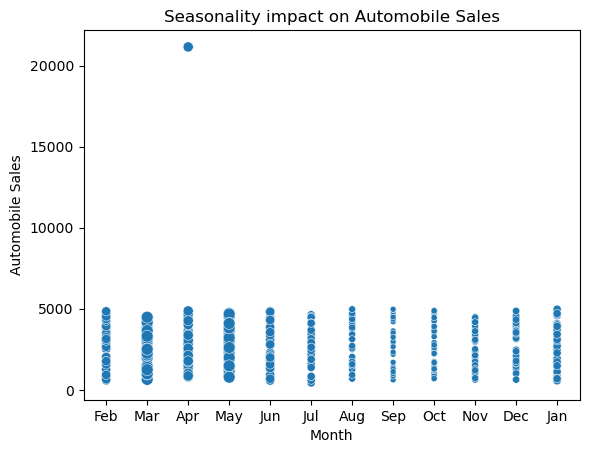

In [30]:
# افترض أن df هو إطار البيانات الذي يحتوي على البيانات المطلوبة
# تصفية البيانات للحصول على سنوات غير الركود
non_rec_data = df[df['Recession'] == 0]

# تحديد حجم الفقاعات باستخدام وزن الموسمية
size = non_rec_data['Seasonality_Weight']

# إنشاء المخطط الفقاعي
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, legend=False)

# تعيين التسميات والعنوان
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

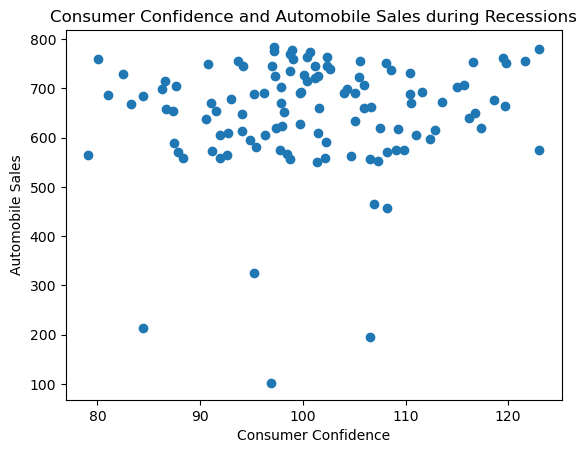

In [32]:
# افترض أن df هو إطار البيانات الذي يحتوي على البيانات المطلوبة
# تصفية البيانات للحصول على فترات الركود
rec_data = df[df['Recession'] == 1]

# إنشاء المخطط المبعثر
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])

# تعيين التسميات والعنوان
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')

plt.show()

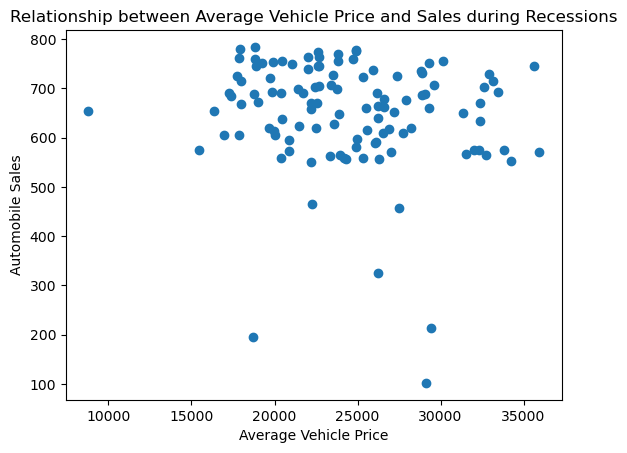

In [34]:
# افترض أن df هو إطار البيانات الذي يحتوي على البيانات المطلوبة
# تصفية البيانات للحصول على فترات الركود
rec_data = df[df['Recession'] == 1]

# إنشاء المخطط المبعثر
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])

# تعيين التسميات والعنوان
plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')

plt.show()

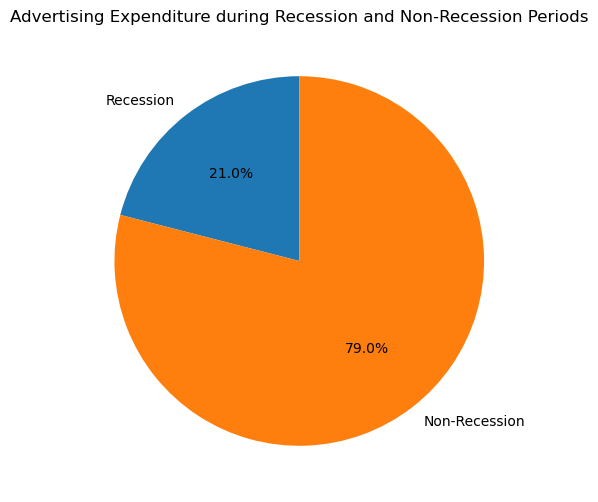

In [36]:
# افترض أن df هو إطار البيانات الذي يحتوي على البيانات المطلوبة
# تصفية البيانات للحصول على فترات الركود وفترات غير الركود
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# حساب إجمالي الإنفاق الإعلاني لكل فترة
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

# إنشاء المخطط الدائري للإنفاق الإعلاني
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure during Recession and Non-Recession Periods')

plt.show()

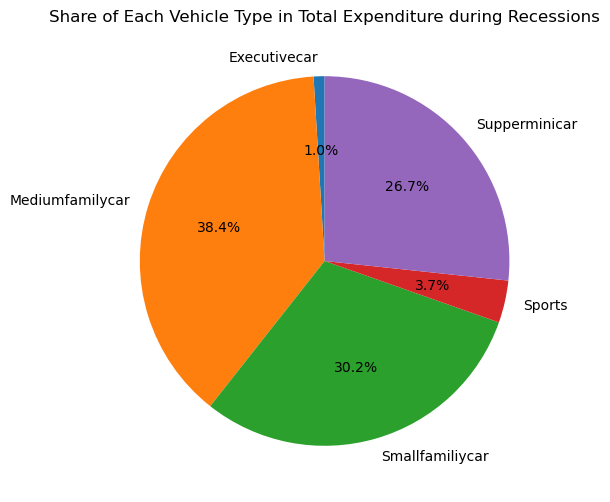

In [38]:
# افترض أن df هو إطار البيانات الذي يحتوي على البيانات المطلوبة
# تصفية البيانات للحصول على فترات الركود
Rdata = df[df['Recession'] == 1]

# حساب إجمالي الإنفاق الإعلاني لكل نوع مركبة خلال فترات الركود
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# إنشاء المخطط الدائري لنسبة كل نوع مركبة في إجمالي الإنفاق خلال فترات الركود
plt.figure(figsize=(8, 6))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Share of Each Vehicle Type in Total Expenditure during Recessions')

plt.show()

C:\Users\welcome\AppData\Local\Temp\ipykernel_24072\3750170822.py:6: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',


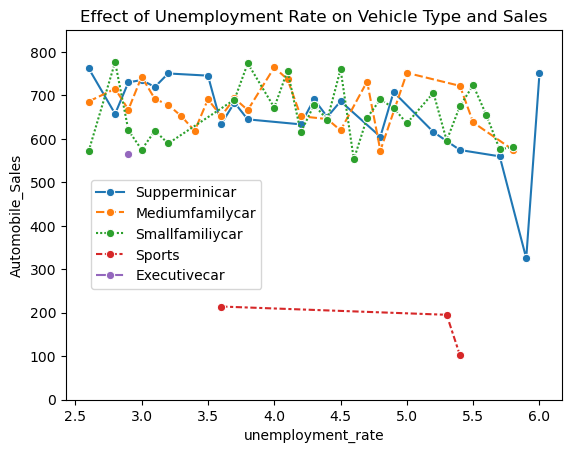

In [40]:
# افترض أن df هو إطار البيانات الذي يحتوي على البيانات المطلوبة
# تصفية البيانات للحصول على فترات الركود
df_rec = df[df['Recession'] == 1]

# إنشاء المخطط الخطي
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)

# تعيين حدود المحور y
plt.ylim(0, 850)

# تعيين موقع الأسطورة
plt.legend(loc=(0.05, 0.3))

# تعيين العنوان
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')

plt.show()

In [42]:
df

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
524,9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
525,10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California
526,11/30/2023,2023,Nov,0,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia


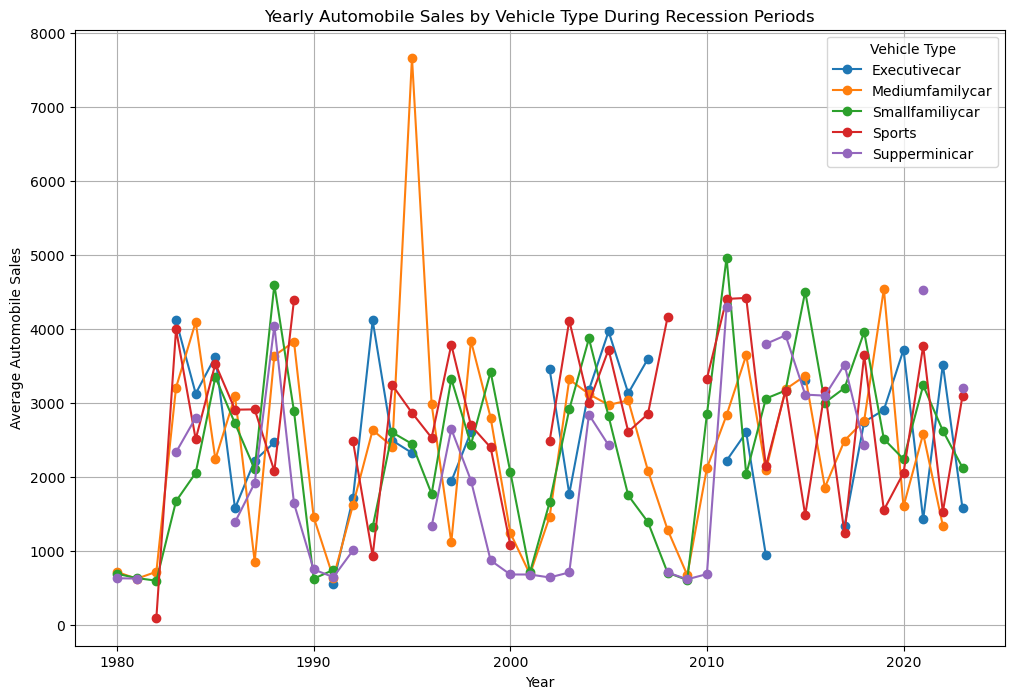

In [44]:
yearly_sales_by_type = df.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].mean().unstack()

# رسم المخطط
plt.figure(figsize=(12, 8))
for vehicle_type in yearly_sales_by_type.columns:
    plt.plot(yearly_sales_by_type.index, yearly_sales_by_type[vehicle_type], marker='o', label=vehicle_type)

plt.title('Yearly Automobile Sales by Vehicle Type During Recession Periods')
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.legend(title='Vehicle Type')
plt.grid(True)
plt.show()

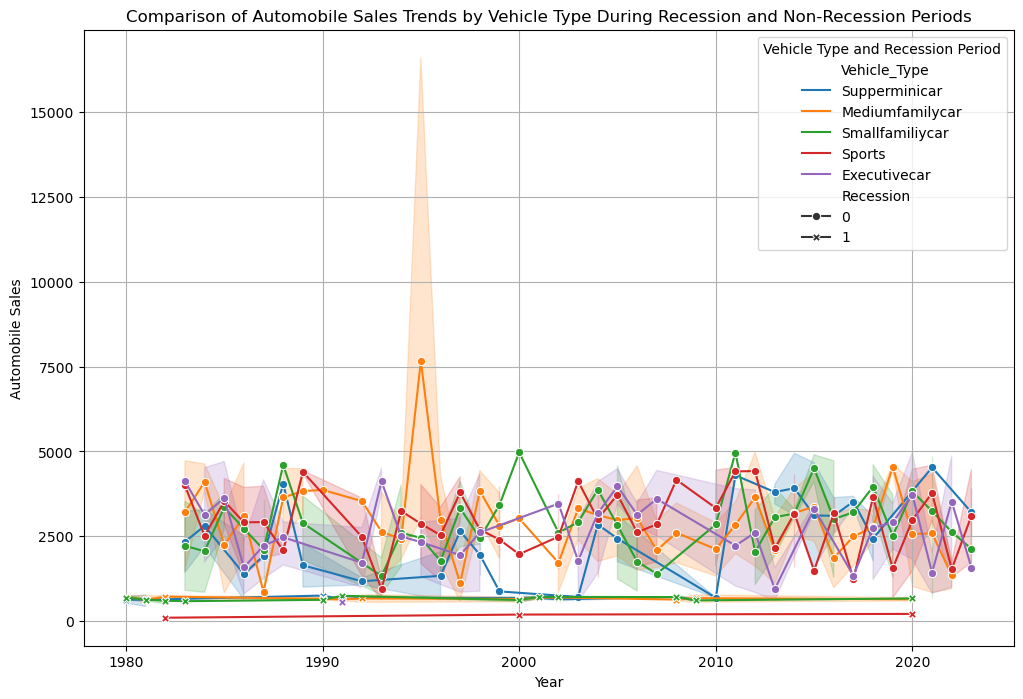

In [50]:
new_df = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# رسم المخطط باستخدام Seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Year', y='Automobile_Sales', hue='Vehicle_Type', style='Recession', markers=True, dashes=False)

plt.title('Comparison of Automobile Sales Trends by Vehicle Type During Recession and Non-Recession Periods')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.legend(title='Vehicle Type and Recession Period')
plt.grid(True)
plt.show()

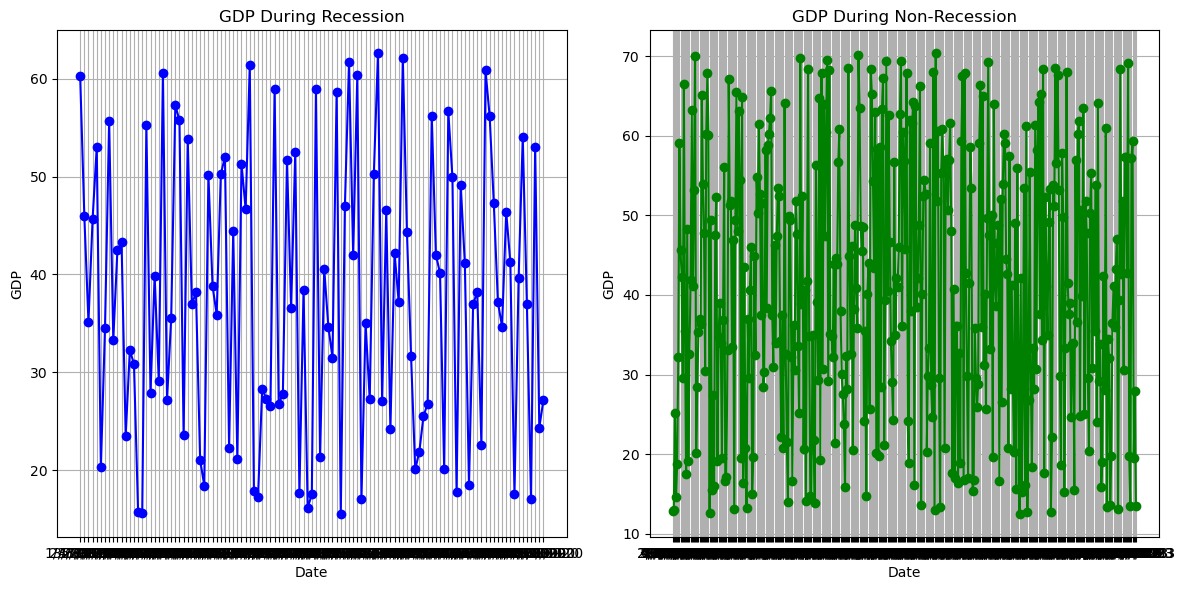

In [52]:
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# إنشاء الشكل
fig = plt.figure(figsize=(12, 6))

# إنشاء محاور مختلفة للتقطيع الفرعي
ax0 = fig.add_subplot(1, 2, 1)  # إضافة التقطيع الفرعي الأول (1 صف، 2 أعمدة، المخطط الأول)
ax1 = fig.add_subplot(1, 2, 2)  # إضافة التقطيع الفرعي الثاني (1 صف، 2 أعمدة، المخطط الثاني)

# رسم المخطط الخطي لفترة الركود
ax0.plot(rec_data['Date'], rec_data['GDP'], marker='o', color='b')
ax0.set_title('GDP During Recession')
ax0.set_xlabel('Date')
ax0.set_ylabel('GDP')
ax0.grid(True)

# رسم المخطط الخطي لفترة غير الركود
ax1.plot(non_rec_data['Date'], non_rec_data['GDP'], marker='o', color='g')
ax1.set_title('GDP During Non-Recession')
ax1.set_xlabel('Date')
ax1.set_ylabel('GDP')
ax1.grid(True)

# عرض المخططات
plt.tight_layout()
plt.show()

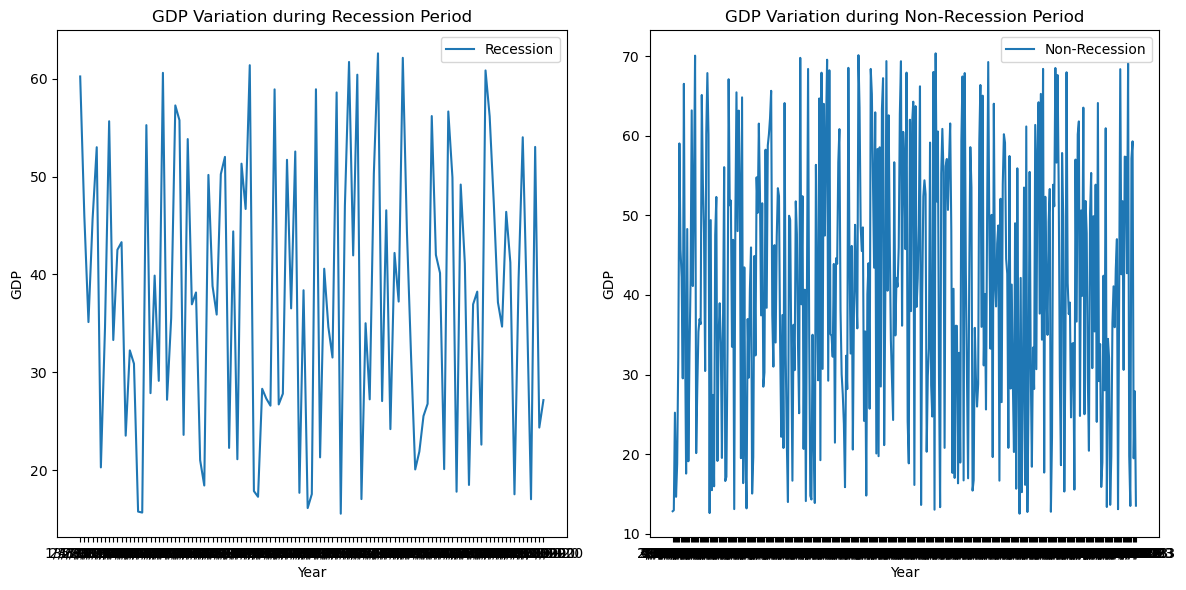

In [54]:
plt.figure(figsize=(12, 6))

# التقطيع الفرعي الأول
plt.subplot(1, 2, 1)
sns.lineplot(x='Date', y='GDP', data=rec_data, label='Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Variation during Recession Period')
plt.legend()

# التقطيع الفرعي الثاني
plt.subplot(1, 2, 2)
sns.lineplot(x='Date', y='GDP', data=non_rec_data, label='Non-Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Variation during Non-Recession Period')
plt.legend()

plt.tight_layout()
plt.show()

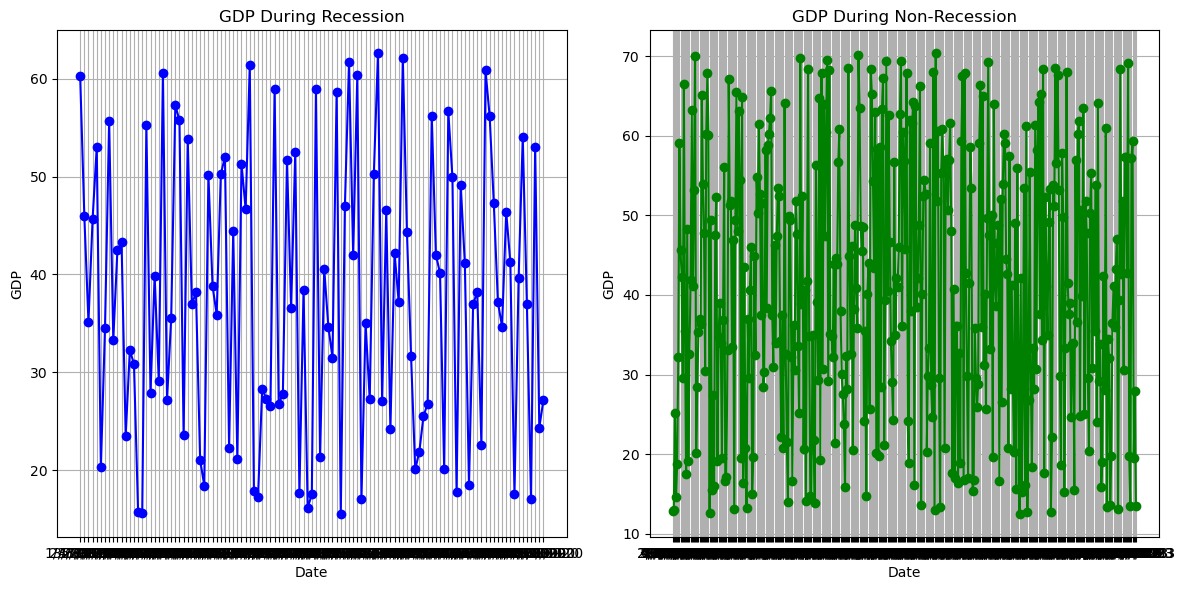

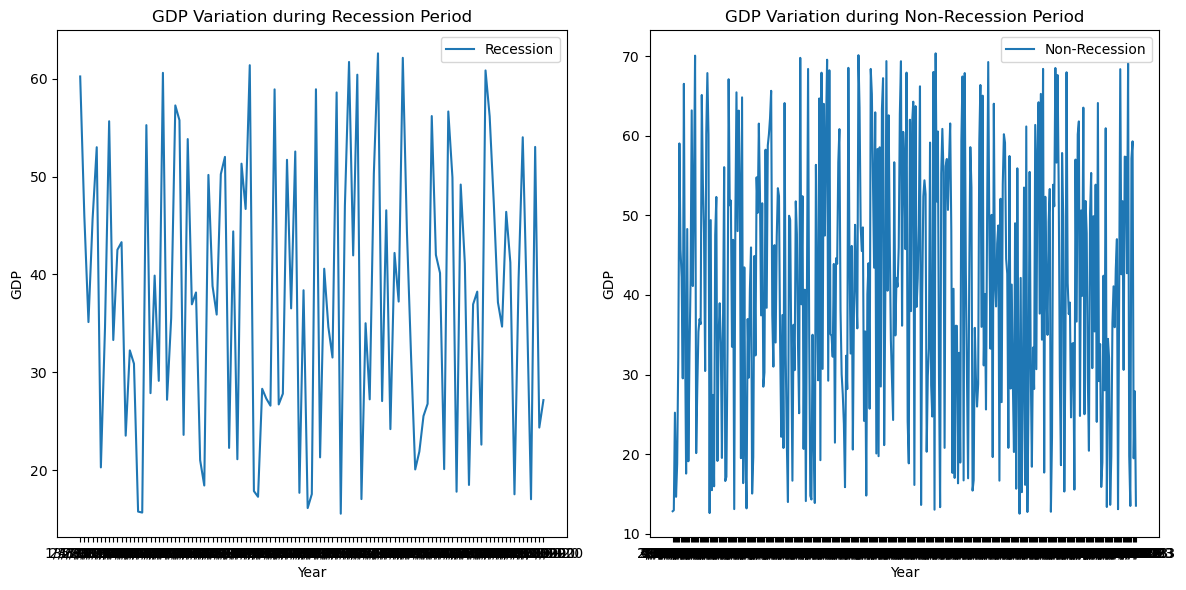

In [56]:
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# إنشاء الشكل
fig = plt.figure(figsize=(12, 6))

# إنشاء محاور مختلفة للتقطيع الفرعي
ax0 = fig.add_subplot(1, 2, 1)  # إضافة التقطيع الفرعي الأول (1 صف، 2 أعمدة، المخطط الأول)
ax1 = fig.add_subplot(1, 2, 2)  # إضافة التقطيع الفرعي الثاني (1 صف، 2 أعمدة، المخطط الثاني)

# رسم المخطط الخطي لفترة الركود
ax0.plot(rec_data['Date'], rec_data['GDP'], marker='o', color='b')
ax0.set_title('GDP During Recession')
ax0.set_xlabel('Date')
ax0.set_ylabel('GDP')
ax0.grid(True)

# رسم المخطط الخطي لفترة غير الركود
ax1.plot(non_rec_data['Date'], non_rec_data['GDP'], marker='o', color='g')
ax1.set_title('GDP During Non-Recession')
ax1.set_xlabel('Date')
ax1.set_ylabel('GDP')
ax1.grid(True)

# عرض المخططات
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))

# التقطيع الفرعي الأول
plt.subplot(1, 2, 1)
sns.lineplot(x='Date', y='GDP', data=rec_data, label='Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Variation during Recession Period')
plt.legend()

# التقطيع الفرعي الثاني
plt.subplot(1, 2, 2)
sns.lineplot(x='Date', y='GDP', data=non_rec_data, label='Non-Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Variation during Non-Recession Period')
plt.legend()

plt.tight_layout()
plt.show()

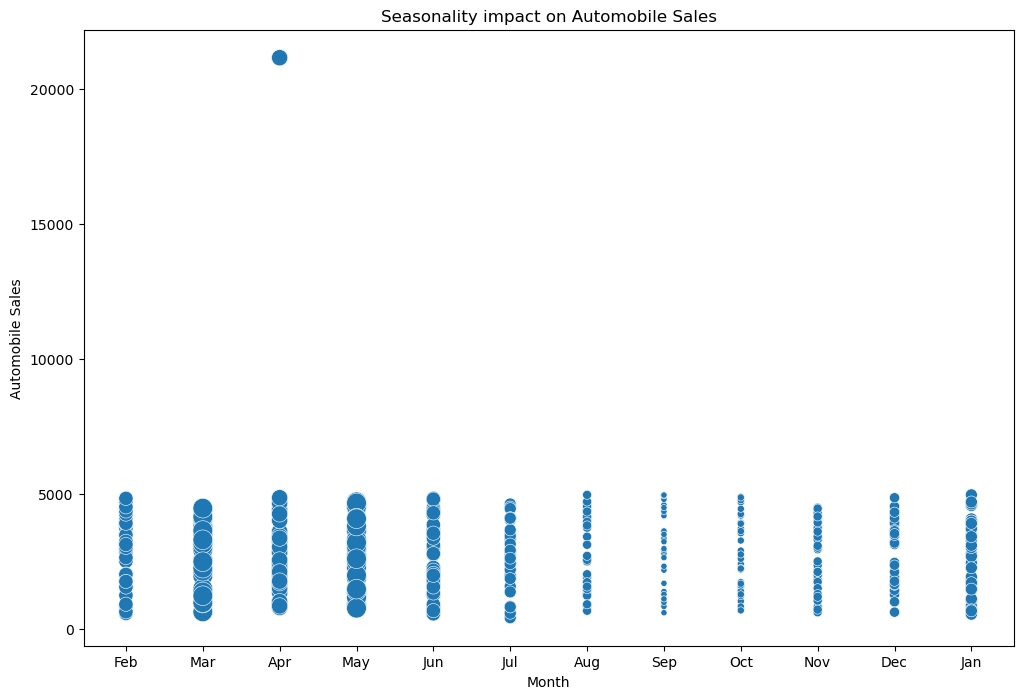

In [58]:
on_rec_data = df[df['Recession'] == 0]

# تحديد حجم الفقاعة باستخدام وزن الموسمية
size = non_rec_data['Seasonality_Weight']

# رسم المخطط الفقاعي باستخدام Seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, sizes=(20, 200), legend=False)

plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

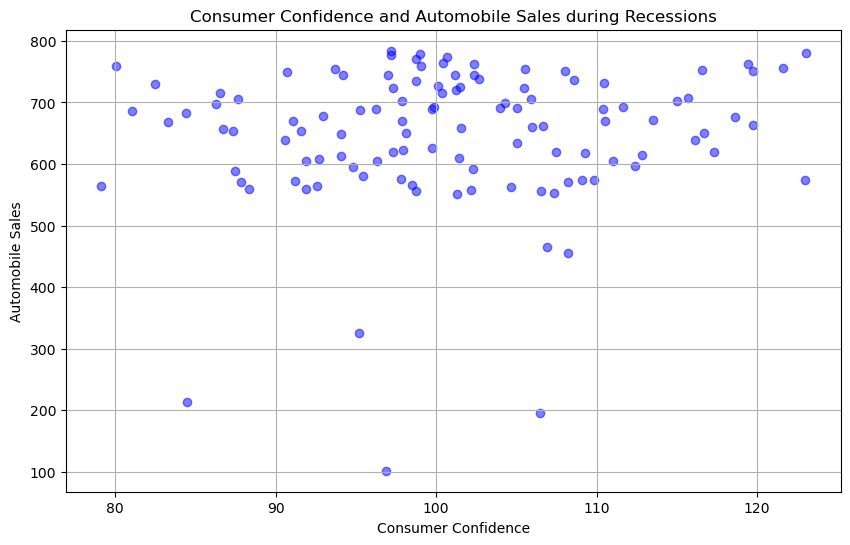

In [60]:
rec_data = df[df['Recession'] == 1]

# رسم المخطط التشتت باستخدام Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'], color='b', alpha=0.5)

plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')

plt.grid(True)
plt.show()

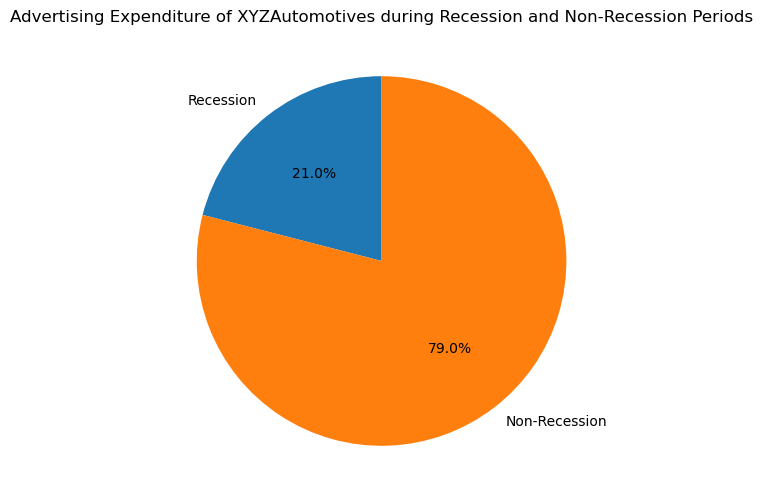

In [62]:
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

# Create a pie chart for the advertising expenditure
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure of XYZAutomotives during Recession and Non-Recession Periods')

plt.show()

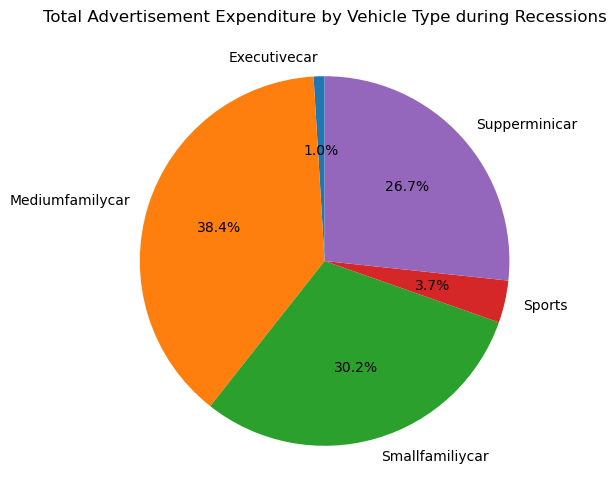

In [64]:
Rdata = df[df['Recession'] == 1]

# Calculate the total advertisement expenditure by vehicle type during recessions
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart for the share of each vehicle type in total expenditure during recessions
plt.figure(figsize=(8, 6))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Total Advertisement Expenditure by Vehicle Type during Recessions')

plt.show()

C:\Users\welcome\AppData\Local\Temp\ipykernel_24072\275860670.py:4: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)


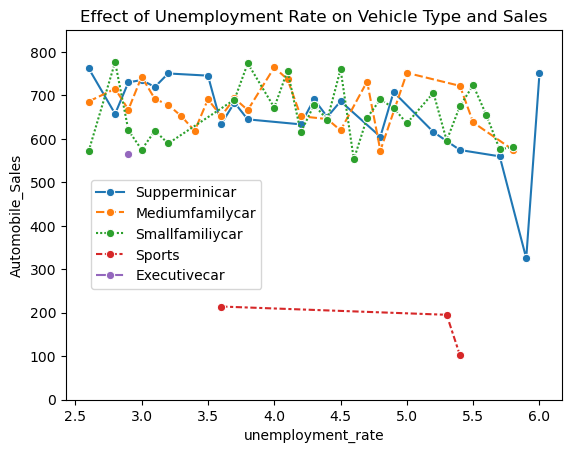

In [66]:
df_rec = df[df['Recession'] == 1]

# إنشاء المخطط الخطي
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)

plt.ylim(0, 850)
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.legend(loc=(0.05, 0.3))
plt.show()